In [120]:
import pandas as pd
from googletrans import Translator
import random
import matplotlib.pyplot as plt

In [121]:
# Reading the file and converting it to a DataFrame
def read_file_to_dataframe(filename):
    data = []
    
    with open("./data/" + filename, 'r', encoding='utf-8') as file:
        for linha in file:
            linha = linha.strip()  # Remove leading/trailing spaces and newlines
            filme = linha.split('\t')  # Split by tab
            data.append(filme)  # Append the row to the data list
    
    # Convert the list of rows to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df

In [122]:
# Balance dataset (Remove from drama)

def removeDramas(df):
    drama_movies = df[df['Genre'] == 'drama']
    random_drama_sample = drama_movies.sample(n=400, random_state=42)  # random_state ensures reproducibility
    df = df.drop(random_drama_sample.index)
    return df

In [123]:
def translateText(text, translator):
    languages = ['fr','pt','es']

    if not isinstance(text, str):
        text = str(text)

    languageDest= random.choice(languages)

    while languageDest is None:
        languageDest = random.choice(languages)
   
    try:
        translated = translator.translate(text, dest=languageDest).text
    except Exception as e:
        return text

    try:
        back_translated = translator.translate(translated, dest='en').text
    except Exception as e:
        return text    
        
    if back_translated is None:
        return text

    return back_translated

In [124]:
translator = Translator()
def increaseGenre(df, genre):
    genre_movies = df.query("Genre == @genre")
    
    genre_count = genre_movies.shape[0]
    top_genre_count =int(df['Genre'].value_counts().max()*0.95)
    
    while genre_count < top_genre_count:
        random_row = genre_movies.sample(n=1)

        plot= random_row['Plot'].iloc[0]
        director= random_row['Director'].iloc[0]
        title= random_row['Title'].iloc[0]

        if plot == None or director == None or title == None:
            print(f'This is the row: [{plot}, {director}, {title}]')
            continue

        
        translated_plot = translateText(plot.strip(), translator)
        translated_director = translateText(director.strip(), translator)
        translated_title = translateText(title.strip(), translator)

        new_row = {
            'Title': translated_title,
            'Origin/Ethnicity': random_row['Origin/Ethnicity'].values[0],
            'Genre': random_row['Genre'].values[0],
            'Director': translated_director,
            'Plot': translated_plot
        }
        new_row_df = pd.DataFrame([new_row])

        df = pd.concat([df, new_row_df], ignore_index=True)
        print(f'Count {genre_count} of {top_genre_count}, so missing {top_genre_count - genre_count}')
        genre_count += 1

    print(f'Finished this genre: {genre}')

    return df

In [125]:
# data = 'train.txt'

# df = read_file_to_dataframe(data)
# df.columns = ['Title', 'Origin/Ethnicity', 'Genre', 'Director', 'Plot']

In [126]:
def balanceDataset(df):
    df = removeDramas(df)
    df = increaseGenre(df, 'sci-fi')
    df = increaseGenre(df, 'animation')
    df = increaseGenre(df, 'crime')
    return df

In [127]:
data = 'train.txt'

df = read_file_to_dataframe(data)

df.columns = ['Title', 'Origin/Ethnicity', 'Genre', 'Director', 'Plot']

In [128]:
df = removeDramas(df)
df = increaseGenre(df, 'sci-fi')

Count 214 of 1212, so missing 998
Count 215 of 1212, so missing 997
Count 216 of 1212, so missing 996
Count 217 of 1212, so missing 995
Count 218 of 1212, so missing 994
Count 219 of 1212, so missing 993
Count 220 of 1212, so missing 992
Count 221 of 1212, so missing 991
Count 222 of 1212, so missing 990
Count 223 of 1212, so missing 989
Count 224 of 1212, so missing 988
Count 225 of 1212, so missing 987
Count 226 of 1212, so missing 986
Count 227 of 1212, so missing 985
Count 228 of 1212, so missing 984
Count 229 of 1212, so missing 983
Count 230 of 1212, so missing 982
Count 231 of 1212, so missing 981
Count 232 of 1212, so missing 980
Count 233 of 1212, so missing 979
Count 234 of 1212, so missing 978
Count 235 of 1212, so missing 977
Count 236 of 1212, so missing 976
Count 237 of 1212, so missing 975
Count 238 of 1212, so missing 974
Count 239 of 1212, so missing 973
Count 240 of 1212, so missing 972
Count 241 of 1212, so missing 971
Count 242 of 1212, so missing 970
Count 243 of 1

In [129]:
df = increaseGenre(df, 'animation')

Count 535 of 1212, so missing 677
Count 536 of 1212, so missing 676
Count 537 of 1212, so missing 675
Count 538 of 1212, so missing 674
Count 539 of 1212, so missing 673
Count 540 of 1212, so missing 672
Count 541 of 1212, so missing 671
Count 542 of 1212, so missing 670
Count 543 of 1212, so missing 669
Count 544 of 1212, so missing 668
Count 545 of 1212, so missing 667
Count 546 of 1212, so missing 666
Count 547 of 1212, so missing 665
Count 548 of 1212, so missing 664
Count 549 of 1212, so missing 663
Count 550 of 1212, so missing 662
Count 551 of 1212, so missing 661
Count 552 of 1212, so missing 660
Count 553 of 1212, so missing 659
Count 554 of 1212, so missing 658
Count 555 of 1212, so missing 657
Count 556 of 1212, so missing 656
Count 557 of 1212, so missing 655
Count 558 of 1212, so missing 654
Count 559 of 1212, so missing 653
Count 560 of 1212, so missing 652
Count 561 of 1212, so missing 651
Count 562 of 1212, so missing 650
Count 563 of 1212, so missing 649
Count 564 of 1

In [130]:
df = increaseGenre(df, 'crime')

Count 541 of 1212, so missing 671
Count 542 of 1212, so missing 670
Count 543 of 1212, so missing 669
Count 544 of 1212, so missing 668
Count 545 of 1212, so missing 667
Count 546 of 1212, so missing 666
Count 547 of 1212, so missing 665
Count 548 of 1212, so missing 664
Count 549 of 1212, so missing 663
Count 550 of 1212, so missing 662
Count 551 of 1212, so missing 661
Count 552 of 1212, so missing 660
Count 553 of 1212, so missing 659
Count 554 of 1212, so missing 658
Count 555 of 1212, so missing 657
Count 556 of 1212, so missing 656
Count 557 of 1212, so missing 655
Count 558 of 1212, so missing 654
Count 559 of 1212, so missing 653
Count 560 of 1212, so missing 652
Count 561 of 1212, so missing 651
Count 562 of 1212, so missing 650
Count 563 of 1212, so missing 649
Count 564 of 1212, so missing 648
Count 565 of 1212, so missing 647
Count 566 of 1212, so missing 646
Count 567 of 1212, so missing 645
Count 568 of 1212, so missing 644
Count 569 of 1212, so missing 643
Count 570 of 1

In [149]:
print(f'Len balanced dataset: {df.shape[0]}')

df = df.sample(frac=1).reset_index(drop=True)
print(f'Len shuffled dataset: {df.shape[0]}')


Len balanced dataset: 9987
Len shuffled dataset: 9987


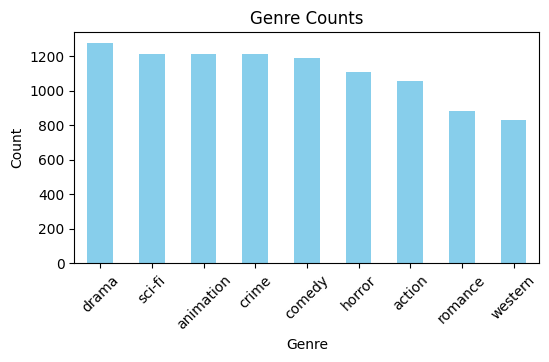

Genre
drama        1276
sci-fi       1212
animation    1212
crime        1212
comedy       1193
horror       1108
action       1059
romance       886
western       829
Name: count, dtype: int64


In [148]:
# Genre Count for train dataset
df = read_file_to_dataframe('balancedDatasetIGuess.txt')

df.columns = ['Title', 'Origin/Ethnicity', 'Genre', 'Director', 'Plot']

genre_counts = df['Genre'].value_counts()

# Plot the histogram
plt.figure(figsize=(6, 3))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(genre_counts)

In [146]:
# Open a file for writing
with open('balancedDatasetIGuess.txt', 'w') as file:
    # Write each row to the file
    for index, row in df.iterrows():
        # Join the row values with a tab and write to file
        
        if isinstance(row['Genre'], pd.Series):
            file.write(f"{row['Title']}\t{row['Origin/Ethnicity'].values[0]}\t{row['Genre'].values[0]}\t{row['Director']}\t{row['Plot']}\n")
        else:
            file.write(f"{row['Title']}\t{row['Origin/Ethnicity']}\t{row['Genre']}\t{row['Director']}\t{row['Plot']}\n")



In [ ]:
# Genre Count for train dataset

genre_counts = df['Genre'].value_counts()

# Plot the histogram
plt.figure(figsize=(6, 3))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(genre_counts)